# Define function to plot RMSE vs Training set size for K-fold CV


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math

def k_fold_plot_RMSE_vs_training_set_size(X, y, k, features, jump, entries):
    
    entries -= entries%k
    X = X[:entries, :]
    y = y[:entries]
    
    uval = math.floor(entries/k)
    test_ratio = math.floor(uval/100)
    train_ratio = 1 - test_ratio
    n = math.floor(features/jump)
    m = math.floor((entries-uval)/jump)

    X = X.reshape(k*uval, features)
    y = y.reshape(k*uval)

    X_test = X[:uval]

    X_test = X_test.reshape(uval, features)
    X_test = np.append(arr = np.ones((uval, 1)), values = X_test, axis=1)
    y_test = y[:uval]

    TRMSE_SD = np.ones((k-1, 1))
    RMSE = np.ones((k-1))

    X_without_XTest = X[uval:, :]
    y_without_yTest = y[uval:]

    num = m
    RMSE = np.ones((m))
    RMSE_SD = np.ones((m))
    X_val = np.ones((m))

    for i in range(m):
        X_val[i] = (i+1)*jump
        RMSE_indi = np.ones((num))
        MSE = 0
        sqr_err = np.zeros((y_test.shape[0]))
        for j in range(num):
            X_train = X_without_XTest[j*jump:(i+j)*jump+(jump)]
            X_train = np.append(arr = np.ones(((i+1)*jump,1)), values = X_train, axis=1)
        
            y_train = y_without_yTest[j*jump:(i+j)*jump+(jump)]
        
            xT = X_train.transpose();
            xTx = np.dot(xT, X_train)
            xTx_pinv = np.linalg.pinv(xTx)
            xTy = np.dot(xT, y_train)
            w = np.dot(xTx_pinv, xTy).reshape(features+1, 1)
        
            y_pred = np.dot(X_test,w).reshape(X_test.shape[0])
            sqr_err += abs(y_pred-y_test)**2
        
            RMSE_indi[j] = (np.mean(abs(y_pred-y_test)**2)**0.5)
        
        RMSE[i] = (np.mean(sqr_err))**0.5
        RMSE_SD[i] = RMSE_indi.std()
        num -= 1
    

    X_val = X_val.astype(int)

    plt.scatter(X_val, RMSE, color="black", s=10)
    plt.errorbar(X_val, RMSE, yerr=RMSE_SD, color="blue", ecolor="red", capsize=3)
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Train set size vs RMSE for k-fold cross validation")
    plt.show()
    

# Same as above function but Plots two graphs in the same plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math

def k_fold_plot_RMSE_vs_training_set_size_double(X1, y1, X2, y2, k, features, jump, entries):
    
    entries -= entries%k
    X1 = X1[:entries, :]
    y1 = y1[:entries]
    X2 = X2[:entries, :]
    y2 = y2[:entries]
    
    uval = math.floor(entries/k)
    test_ratio = math.floor(uval/100)
    train_ratio = 1 - test_ratio
    n = math.floor(features/jump)
    m = math.floor((entries-uval)/jump)

    X1 = X1.reshape(k*uval, features)
    y1 = y1.reshape(k*uval)
    X2 = X2.reshape(k*uval, features)
    y2 = y2.reshape(k*uval)

    X1_test = X1[:uval]
    X2_test = X2[:uval]

    X1_test = X1_test.reshape(uval, features)
    X1_test = np.append(arr = np.ones((uval, 1)), values = X1_test, axis=1)
    y1_test = y1[:uval]
    
    X2_test = X2_test.reshape(uval, features)
    X2_test = np.append(arr = np.ones((uval, 1)), values = X2_test, axis=1)
    y2_test = y2[:uval]

    TRMSE_SD = np.ones((k-1, 1))
    RMSE = np.ones((k-1))

    X1_without_X1Test = X1[uval:, :]
    y1_without_y1Test = y1[uval:]
    
    X2_without_X2Test = X2[uval:, :]
    y2_without_y2Test = y2[uval:]

    num = m
    
    RMSE1 = np.ones((m))
    RMSE_SD1 = np.ones((m))
    X1_val = np.ones((m))
    
    RMSE2 = np.ones((m))
    RMSE_SD2 = np.ones((m))
    X2_val = np.ones((m))

    for i in range(m):
        X1_val[i] = (i+1)*jump
        X2_val[i] = (i+1)*jump
        RMSE1_indi = np.ones((num))
        RMSE2_indi = np.ones((num))
        MSE1 = 0
        MSE2 = 0
        sqr_err1 = np.zeros((y1_test.shape[0]))
        sqr_err2 = np.zeros((y2_test.shape[0]))
        
        for j in range(num):
            X1_train = X1_without_X1Test[j*jump:(i+j)*jump+(jump)]
            X1_train = np.append(arr = np.ones(((i+1)*jump,1)), values = X1_train, axis=1)
            
            X2_train = X2_without_X2Test[j*jump:(i+j)*jump+(jump)]
            X2_train = np.append(arr = np.ones(((i+1)*jump,1)), values = X2_train, axis=1)
        
            y1_train = y1_without_y1Test[j*jump:(i+j)*jump+(jump)]
            y2_train = y2_without_y2Test[j*jump:(i+j)*jump+(jump)]
        
            x1T = X1_train.transpose()
            x1Tx1 = np.dot(x1T, X1_train)
            x1Tx1_pinv = np.linalg.pinv(x1Tx1)
            
            x2T = X2_train.transpose()
            x2Tx2 = np.dot(x2T, X2_train)
            x2Tx2_pinv = np.linalg.pinv(x2Tx2)
            
            x1Ty1 = np.dot(x1T, y1_train)
            x2Ty2 = np.dot(x2T, y2_train)
            
            w1 = np.dot(x1Tx1_pinv, x1Ty1).reshape(features+1, 1)
            w2 = np.dot(x2Tx2_pinv, x2Ty2).reshape(features+1, 1)
        
            y1_pred = np.dot(X1_test,w1).reshape(X1_test.shape[0])
            y2_pred = np.dot(X2_test,w2).reshape(X2_test.shape[0])
            
            sqr_err1 += abs(y1_pred-y1_test)**2
            sqr_err2 += abs(y2_pred-y2_test)**2
        
            RMSE1_indi[j] = (np.mean(abs(y1_pred-y1_test)**2)**0.5)
            RMSE2_indi[j] = (np.mean(abs(y2_pred-y2_test)**2)**0.5)
        
        RMSE1[i] = (np.mean(sqr_err1))**0.5
        RMSE_SD1[i] = RMSE1_indi.std()
        RMSE2[i] = (np.mean(sqr_err2))**0.5
        RMSE_SD2[i] = RMSE2_indi.std()
        num -= 1
    

    X1_val = X1_val.astype(int)
    X2_val = X1_val.astype(int)

    plt.scatter(X1_val, RMSE1, color="black", s=10)
    plt.errorbar(X1_val, RMSE1, yerr=RMSE_SD1, color="blue", ecolor="red", capsize=3)
    
    plt.scatter(X2_val, RMSE2, color="blue", s=10)
    plt.errorbar(X2_val, RMSE2, yerr=RMSE_SD2, color="red", ecolor="black", capsize=3)
    
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Train set size vs RMSE for k-fold cross validation")
    plt.show()
    


# Return params to plot required k-fold CV RMSE vs trainset size graph

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math

def k_fold_plot_RMSE_vs_training_set_size_params(X, y, k, features, jump, entries):
    
    entries -= entries%k
    X = X[:entries, :]
    y = y[:entries]
    
    uval = math.floor(entries/k)
    test_ratio = math.floor(uval/100)
    train_ratio = 1 - test_ratio
    n = math.floor(features/jump)
    m = math.floor((entries-uval)/jump)

    X = X.reshape(k*uval, features)
    y = y.reshape(k*uval)

    X_test = X[:uval]

    X_test = X_test.reshape(uval, features)
    X_test = np.append(arr = np.ones((uval, 1)), values = X_test, axis=1)
    y_test = y[:uval]

    TRMSE_SD = np.ones((k-1, 1))
    RMSE = np.ones((k-1))

    X_without_XTest = X[uval:, :]
    y_without_yTest = y[uval:]

    num = m
    RMSE = np.ones((m))
    RMSE_SD = np.ones((m))
    X_val = np.ones((m))

    for i in range(m):
        X_val[i] = (i+1)*jump
        RMSE_indi = np.ones((num))
        MSE = 0
        sqr_err = np.zeros((y_test.shape[0]))
        for j in range(num):
            X_train = X_without_XTest[j*jump:(i+j)*jump+(jump)]
            X_train = np.append(arr = np.ones(((i+1)*jump,1)), values = X_train, axis=1)
        
            y_train = y_without_yTest[j*jump:(i+j)*jump+(jump)]
        
            xT = X_train.transpose();
            xTx = np.dot(xT, X_train)
            xTx_pinv = np.linalg.pinv(xTx)
            xTy = np.dot(xT, y_train)
            w = np.dot(xTx_pinv, xTy).reshape(features+1, 1)
        
            y_pred = np.dot(X_test,w).reshape(X_test.shape[0])
            sqr_err += abs(y_pred-y_test)**2
        
            RMSE_indi[j] = (np.mean(abs(y_pred-y_test)**2)**0.5)
        
        RMSE[i] = (np.mean(sqr_err))**0.5
        RMSE_SD[i] = RMSE_indi.std()
        num -= 1
    

    X_val = X_val.astype(int)
    
    ans = np.ones((3, X_val.shape[0]))
    ans[0] = X_val
    ans[1] = RMSE
    ans[2] = RMSE_SD

    return ans
    

# Finding weights and plotting graphs after applying Laplace mechanism

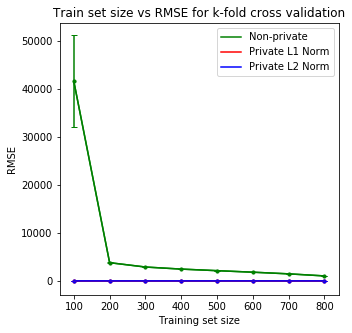

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math
from sklearn.preprocessing import normalize
import pylab

entries = 1000                  
features = 100 
d = features
elems = (d*(d+1))/2
epsilon = 0.5  
jump = math.floor(entries/10)
k = 5

# Getting synthetic data
X,y = make_regression(n_samples = entries, n_features = features, noise = 1000)

# Appending a column of ones to X
X_with_bias = np.append(arr=np.ones((X.shape[0],1)) , values=X , axis=1)

# L1 normalize
X_with_bias1 = normalize(X_with_bias, norm='l1')
y1 = y/sum(abs(y))

# L2 normalize
# X_with_bias2 = normalize(X_with_bias, norm='l2')
# RMS = (sum(y**2))**0.5
# y2 = y/RMS

# Some helpful calculations which we will need later xT represents X'
xT1 = X_with_bias1.transpose()
xTx1 = np.dot(xT1, X_with_bias1)
xTy1 = np.dot(xT1, y1)

xT2 = X_with_bias2.transpose()
xTx2 = np.dot(xT2, X_with_bias2)
xTy2 = np.dot(xT2, y2)

# Laplace Scales
b1 = elems/(epsilon)
b2 = d/(epsilon)

# Finding laplace noises U and V to apply on X'X and X'y
mirror_half = math.floor(((d+2)/2)*(d+1))
u_mirr = np.random.laplace(loc=0.0, scale=b1, size = mirror_half)
pos = 0
u = np.ones((d+1, d+1))
for i in range(d+1):
    for j in range(i, d+1):
        u[j][i] = u_mirr[pos]
        u[i][j] = u[j][i]
        pos = pos+1
v = np.random.laplace(loc=0.0, scale=b2, size = d+1)

# Converting X and Y to S and T. Suffixes 1 and 2 indicate L1 and L2 normalization respectively
sTs1 = xTx1 + u
sTt1 = xTy1 + v
sTs2 = xTx2 + u
sTt2 = xTy2 + v

# Calcultions to find private and non-private weights by L1 Normalization
sTspinv1 = np.linalg.pinv(sTs1)
wi1 = np.dot(sTspinv1, sTt1)
xTxpinv1 = np.linalg.pinv(xTx1)
w1 = np.dot(xTxpinv1, xTy1)

# Calcultions to find private and non-private weights by L2 Normalization
sTspinv2 = np.linalg.pinv(sTs2)
wi2 = np.dot(sTspinv2, sTt2)
xTxpinv2 = np.linalg.pinv(xTx2)
w2 = np.dot(xTxpinv2, xTy2)

# Finding T1 and T2 which is T with L1/L2 Normalisation respectively
T1 = np.dot(X_with_bias, wi1)
T2 = np.dot(X_with_bias, wi2)

# Plotting the graph
plt.rcParams['figure.figsize'] = (5, 5)

ans = k_fold_plot_RMSE_vs_training_set_size_params(X, y, k, features, jump, entries)

plt.errorbar(ans[0], ans[1], yerr=ans[2], color="green", ecolor="green", capsize=3)
plt.scatter(ans[0], ans[1], color="green", s=10)
pylab.plot(ans[0], ans[1], '-g', label='Non-private')

ans = k_fold_plot_RMSE_vs_training_set_size_params(X, T1, k, features, jump, entries)

plt.errorbar(ans[0], ans[1], yerr=ans[2], color="red", ecolor="red", capsize=3)
plt.scatter(ans[0], ans[1], color="red", s=10)
pylab.plot(ans[0], ans[1], '-r', label='Private L1 Norm')

ans = k_fold_plot_RMSE_vs_training_set_size_params(X, T2, k, features, jump, entries)

plt.errorbar(ans[0], ans[1], yerr=ans[2], color="blue", ecolor="blue", capsize=3)
plt.scatter(ans[0], ans[1], color="blue", s=10)
pylab.plot(ans[0], ans[1], '-b', label='Private L2 Norm')

pylab.legend(loc='upper right')
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Train set size vs RMSE for k-fold cross validation")
plt.show()
# print(abs(T1-y))
# print(abs(w1-wi1))

# Function to plot graphs of non-private and multiple epsilon-DP graphs in one plot per entry size for a given no of features

In [19]:
def multiple_epsilon_plotter(entries, features, epsilon, k, colors):
    
    # Getting synthetic data
    totalX, totaly = make_regression(n_samples = entries[len(entries)-1], n_features = features[len(features) - 1], noise = 10)
    plotnum = 1
    
    for i in range(len(entries)):
        for j in range(len(features)):
            
            # Setting some params
            feature = features[j]
            d = feature
            entry = entries[i]
            elems = ((d+2)*(d+1))/2
            jump = math.floor(entry / 10)
            
            # entry is basically 500,1000,5000,10000
            X,y = totalX[0:entry, 0:feature], totaly[0:entry]
            
            # Apply ones(unit bias) to first column on X
            X_with_bias = np.append(arr=np.ones((X.shape[0],1)) , values=X , axis=1)
            
            # l1 Normalising X and y
            X_with_bias = normalize(X_with_bias, norm='l1')
            y = y/sum(abs(y))
            
#             X_with_bias = normalize(X_with_bias, norm='l2')
#             RMS = (sum(y**2))**0.5
#             y = y/RMS
            
            xT = X_with_bias.transpose()
            
            # Covariance X'X and X'y
            xTx = np.dot(xT, X_with_bias)
            xTy = np.dot(xT, y)           
            
            # Plotting graph for X and y
            plt.rcParams['figure.figsize'] = (15, 12)
            ans = k_fold_plot_RMSE_vs_training_set_size_params(X, y, k, feature, jump, entry)
            plt.subplot(4,4,plotnum)
            plt.errorbar(ans[0], ans[1], yerr=ans[2], color=colors[4], ecolor=colors[4], capsize=3, label='NP')
            plt.scatter(ans[0], ans[1], color=colors[4], s=10)
            
            for l in range(len(epsilon)):

                # Setting laplace scales to apply laplace noise on xTx and xTy to make it sTs and sTt
                b1 = elems/(epsilon[l])
                b2 = (d+1)/(epsilon[l])
                
                # Laplace noise values of sizes of xTx and xTy to make it sTs and sTt
                
                mirror_half = math.floor(((d+2)/2)*(d+1))
                u_mirr = np.random.laplace(loc=0.0, scale=b1, size = mirror_half)
                pos = 0
                u = np.ones((d+1, d+1))
                for r in range(d+1):
                    for c in range(r, d+1):
                        u[c][r] = u_mirr[pos]
                        u[r][c] = u[c][r]
                        pos = pos+1
                
                v = np.random.laplace(loc=0.0, scale=b2, size=d+1)
                sTs = xTx + u
                sTt = xTy + v
                
                # sTs ^ -1 and xTx ^ -1
                sTspinv = np.linalg.pinv(sTs)
                xTxpinv = np.linalg.pinv(xTx)
                
                # The weights before and after Laplace mechanism
                w = np.dot(xTxpinv, xTy)
                wi = np.dot(sTspinv, sTt)
                
                # Get T and plot
                T = np.dot(X_with_bias, wi)
                
                ans = k_fold_plot_RMSE_vs_training_set_size_params(X, T, k, feature, jump, entry)
                plt.errorbar(ans[0], ans[1], yerr=ans[2], color=colors[l], ecolor=colors[l], capsize=3, label=epsilon[l])
                plt.scatter(ans[0], ans[1], color=colors[l], s=10)
            
            plt.gca().legend(("Non-private",'ε '+str(epsilon[0]),'ε '+str(epsilon[1]),'ε '+str(epsilon[2]),'ε '+str(epsilon[3]),))
            plt.xlabel("Training set size")
            plt.ylabel("RMSE")             
            plotnum = plotnum+1
            
    plt.tight_layout()
    plt.show()
            


# Plotting a graphs for varying entries(n), features(d) and privacy budgets(epsilon)

### n = 500, 1000, 5000, 10000
### d = 10, 50, 100, 500
### eps = 0.5, 1, 2, 5

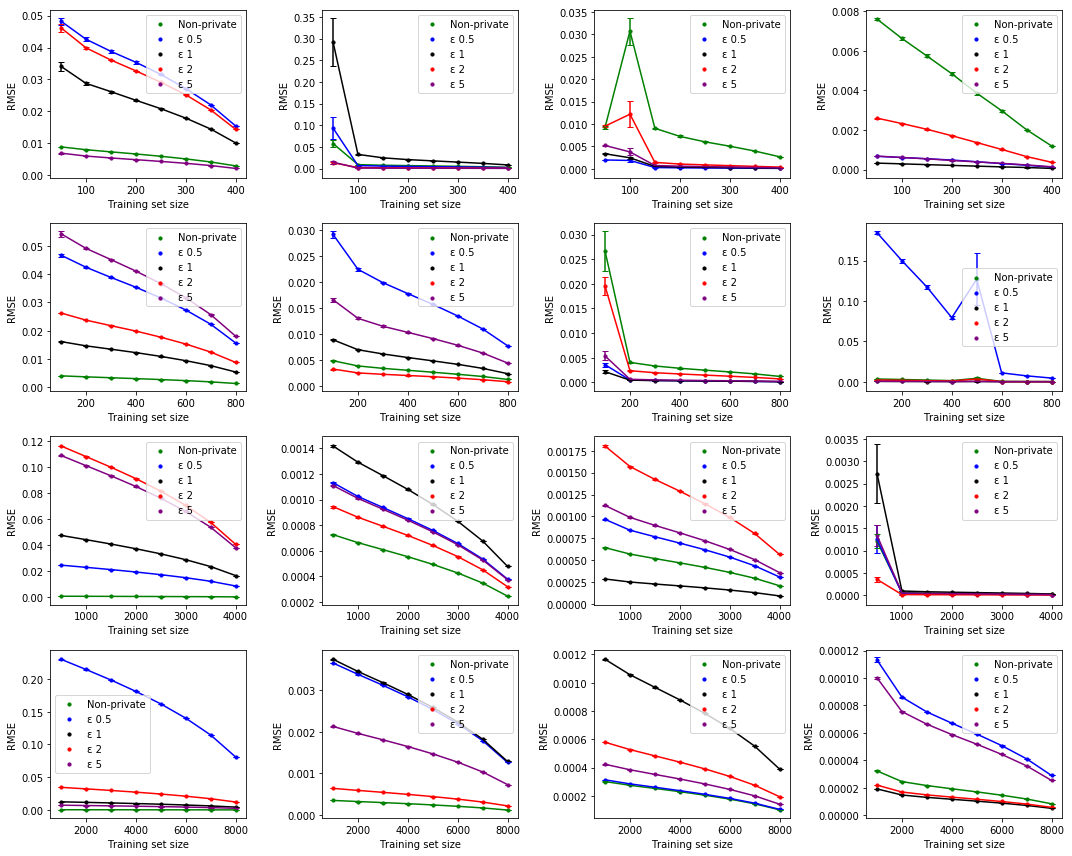

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math
from sklearn.preprocessing import normalize
import pylab

entries = [500, 1000, 5000, 10000]                     
features = [10, 50, 100, 500]
epsilon = [0.5, 1, 2, 5] 
k = 5
colors = ["blue", "black", "red", "purple", "green"]

multiple_epsilon_plotter(entries, features, epsilon, k, colors)

# Laplace Mechanism on UCI Datasets - Forest Fire

L2 Norm


No handles with labels found to put in legend.


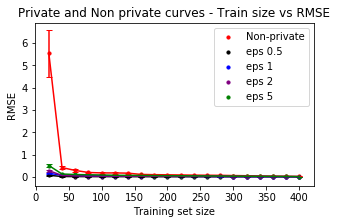

In [21]:
import math
import numpy as np
import pandas as pd

df = pd.read_csv("forestfires.csv")

# One hot Encode month and day, remove month and day -- avoiding dummy variable trap
month_dummies = pd.get_dummies(df.month).iloc[:, :-1]
# print(df)
df = pd.concat([df, month_dummies], axis='columns')
df = df.drop(['month'], axis='columns')
day_dummies = pd.get_dummies(df.day).iloc[:, :-1]
df = pd.concat([df, day_dummies], axis='columns')
df = df.drop(['day'], axis='columns')
# df.iloc[df.area]
y = df['area'].values
df = df.drop(['area'], axis='columns')
X = df.iloc[:, :].values

features = 27
entries = 517
d = features
k = 5
jump = 20
eps = [0.5, 1, 2, 5]
elems = ((d+2)*(d+1))/2

X_with_bias = np.append(arr=np.ones((X.shape[0],1)) , values=X , axis=1)

# X_with_bias = normalize(X_with_bias, norm='l1')
# y = y/sum(abs(y))
# print("L1 Norm")

X_with_bias = normalize(X_with_bias, norm='l2')
RMS = (sum(y**2))**0.5
y = y/RMS
print("L2 Norm")

xT = X_with_bias.transpose()
xTx = np.dot(xT, X_with_bias)
xTy = np.dot(xT, y)

colors = ["black", "blue", "purple", "green", "red"]
ans = k_fold_plot_RMSE_vs_training_set_size_params(X, y, k, features, jump, entries)

plt.rcParams['figure.figsize'] = (5,3)

plt.errorbar(ans[0], ans[1], yerr=ans[2], color=colors[len(colors)-1], ecolor=colors[len(colors)-1], capsize=3)
plt.scatter(ans[0], ans[1], color=colors[len(colors)-1], s=10)

for i in range(len(eps)):
    
    epsilon = eps[i]
    
    b1 = elems/epsilon
    b2 = (d+1)/epsilon
    
    mirror_half = math.floor(((d+2)/2)*(d+1))
    u_mirr = np.random.laplace(loc=0.0, scale=b1, size = mirror_half)
    pos = 0
    u = np.ones((d+1, d+1))
    for r in range(d+1):
        for c in range(r, d+1):
            u[c][r] = u_mirr[pos]
            u[r][c] = u[c][r]
            pos = pos+1
    v = np.random.laplace(loc=0.0, scale=b2, size=d+1)

    sTs = xTx + u
    sTt = xTy + v

    sTspinv = np.linalg.pinv(sTs)
    wi = np.dot(sTspinv, sTt)

    xTxpinv = np.linalg.pinv(xTx)
    w = np.dot(xTxpinv, xTy)

    T = np.dot(X_with_bias, wi)
    
    ans = k_fold_plot_RMSE_vs_training_set_size_params(X, T, k, features, jump, entries)

    plt.errorbar(ans[0], ans[1], yerr=ans[2], color=colors[i], ecolor=colors[i], capsize=3)
    plt.scatter(ans[0], ans[1], color=colors[i], s=10)


pylab.legend(loc='upper right')
plt.gca().legend(('Non-private','eps 0.5', 'eps 1', 'eps 2', 'eps 5'))  
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Private and Non private curves - Train size vs RMSE")
plt.show()


# Laplace Mechanism on UCI Datasets - Parkinsons

L2 Norm


No handles with labels found to put in legend.


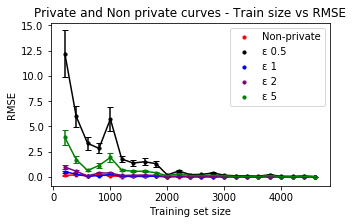

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas.compat import StringIO

df = pd.read_csv("parkinsons_updrs.data", 
                 sep="\s+", 
                 skiprows=1,
                 usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], 
                 names=['subject','age','sex','test_time','motor_UPDRS','total_UPDRS','Jitter(%)','Jitter(Abs)','Jitter:RAP','Jitter:PPQ5','Jitter:DDP','Shimmer','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA','NHR','HNR','RPDE','DFA','PPE'])

y = df.iloc[:, 5].values # total_UPDRS
y2 = df.iloc[:, 4].values # motor_UPDRS

df = df.drop(['total_UPDRS'], axis='columns')

subject_dummies = pd.get_dummies(df.subject).iloc[:, :-1]
df = pd.concat([subject_dummies, df], axis='columns')
X = df.iloc[:, :].values

k = 5
features = X.shape[1]
d = features
entries = X.shape[0]
jump = 200
eps = [0.5, 1, 2, 5]
elems = ((d+2)*(d+1))/2

X_with_bias = np.append(arr=np.ones((X.shape[0],1)) , values=X , axis=1)

# X_with_bias = normalize(X_with_bias, norm='l1')
# y = y/sum(abs(y))
# print("L1 Norm")

X_with_bias = normalize(X_with_bias, norm='l2')
RMS = (sum(y**2))**0.5
y = y/RMS
print("L2 Norm")

xT = X_with_bias.transpose()
xTx = np.dot(xT, X_with_bias)
xTy = np.dot(xT, y)

colors = ["black", "blue", "purple", "green", "red"]
ans = k_fold_plot_RMSE_vs_training_set_size_params(X, y, k, features, jump, entries)

plt.rcParams['figure.figsize'] = (5,3)

plt.errorbar(ans[0], ans[1], yerr=ans[2], color=colors[len(colors)-1], ecolor=colors[len(colors)-1], capsize=3)
plt.scatter(ans[0], ans[1], color=colors[len(colors)-1], s=10)

for i in range(len(eps)):
    
    epsilon = eps[i]
    
    b1 = elems/epsilon
    b2 = (d+1)/epsilon

    mirror_half = math.floor(((d+2)/2)*(d+1))
    u_mirr = np.random.laplace(loc=0.0, scale=b1, size = mirror_half)
    pos = 0
    u = np.ones((d+1, d+1))
    for r in range(d+1):
        for c in range(r, d+1):
            u[c][r] = u_mirr[pos]
            u[r][c] = u[c][r]
            pos = pos+1
    v = np.random.laplace(loc=0.0, scale=b2, size=d+1)

    sTs = xTx + u
    sTt = xTy + v

    sTspinv = np.linalg.pinv(sTs)
    wi = np.dot(sTspinv, sTt)

    xTxpinv = np.linalg.pinv(xTx)
    w = np.dot(xTxpinv, xTy)

    T = np.dot(X_with_bias, wi)
    
    ans = k_fold_plot_RMSE_vs_training_set_size_params(X, T, k, features, jump, entries)

    plt.errorbar(ans[0], ans[1], yerr=ans[2], color=colors[i], ecolor=colors[i], capsize=3)
    plt.scatter(ans[0], ans[1], color=colors[i], s=10)


pylab.legend(loc='upper right')
plt.gca().legend(('Non-private','ε 0.5', 'ε 1', 'ε 2', 'ε 5'))  
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Private and Non private curves - Train size vs RMSE")
plt.show()


# Alternate


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math

def k_fold_priv_plot_RMSE_vs_training_set_size_params(X, y, k, features, jump, entries, epsilon):
    
    entries -= entries%k
    X = X[:entries, :]
    y = y[:entries]
    d = features
    elems = math.floor((d+1)*(d+2)/2)
    
    uval = math.floor(entries/k)
    test_ratio = math.floor(uval/100)
    train_ratio = 1 - test_ratio
    n = math.floor(features/jump)
    m = math.floor((entries-uval)/jump)

    X = X.reshape(k*uval, features)
    y = y.reshape(k*uval)
    
    RMSE_per_fold = np.ones((m, k))
    RMSE_SD_per_fold = np.ones((m, k))
    priv_RMSE_per_fold = np.ones((m, k))
    priv_RMSE_SD_per_fold = np.ones((m, k))
    X_val = np.ones((m))

    for l in range(k):

        X_test = X[uval*l:(uval*l)+uval]
        X_test = np.append(arr = np.ones((uval, 1)), values = X_test, axis=1)
        y_test = y[uval*l:(uval*l)+uval]
        
        TRMSE_SD = np.ones((k-1, 1))
        RMSE = np.ones((k-1))
        
        X_without_XTest = X[:uval*l, :]
        X_without_XTest = np.append(arr=X_without_XTest, values=X[(uval*l)+uval:, :]).reshape(entries-uval, features)
        y_without_yTest = y[:uval*l]
        y_without_yTest = np.append(arr=y_without_yTest, values=y[(uval*l)+uval:])

        num = m
        
        for i in range(m):
            X_val[i] = (i+1)*jump
            
            RMSE_indi = np.ones((num))
            priv_RMSE_indi = np.ones((num))
            
            for j in range(num):
                X_train = X_without_XTest[j*jump:(i+j)*jump+(jump), :]
                X_train = np.append(arr = np.ones((X_train.shape[0],1)), values = X_train, axis=1)
        
                y_train = y_without_yTest[j*jump:(i+j)*jump+(jump)]

                xT = X_train.transpose();
                xTx = np.dot(xT, X_train)
                xTx_pinv = np.linalg.pinv(xTx)
                xTy = np.dot(xT, y_train)
                w = np.dot(xTx_pinv, xTy).reshape(features+1, 1)
                y_pred = np.dot(X_test, w)
                
                b1 = elems/epsilon
                b2 = (d+1)/epsilon
                u_mirr = np.random.laplace(loc=0.0, scale=b1, size = elems)
                pos = 0
                u = np.ones((d+1, d+1)) 
                for r in range(d+1):
                    for c in range(r, d+1):
                        u[c][r] = u_mirr[pos]
                        u[r][c] = u[c][r]
                        pos = pos+1
                v = np.random.laplace(loc=0.0, scale=b2, size=d+1)
                sTs = xTx + u
                sTt = xTy + v
                sTspinv = np.linalg.pinv(sTs)
                wi = np.dot(sTspinv, sTt) 
                T = np.dot(X_test,wi).reshape(X_test.shape[0])    
            
                RMSE_indi[j] = (np.mean(abs(y_pred-y_test)**2)**0.5)
                priv_RMSE_indi[j] = (np.mean(abs(T-y_test)**2)**0.5)
                
            
            RMSE_per_fold[i][l] = np.mean(RMSE_indi)
            RMSE_SD_per_fold[i][l] = RMSE_indi.std()
            priv_RMSE_per_fold[i][l] = np.mean(priv_RMSE_indi)
            priv_RMSE_SD_per_fold[i][l] = priv_RMSE_indi.std()
            num -= 1
            
    
    X_val = X_val.astype(int)
    total_RMSE = sum(RMSE_per_fold.transpose())/5
    total_RMSE_SD = sum(RMSE_SD_per_fold.transpose())/5
    
    priv_total_RMSE = sum(priv_RMSE_per_fold.transpose())/5
    priv_total_RMSE_SD = sum(priv_RMSE_SD_per_fold.transpose())/5
    
    ans = np.ones((5, X_val.shape[0]))
    ans[0] = X_val
    ans[1] = total_RMSE
    ans[2] = total_RMSE_SD
    ans[3] = priv_total_RMSE
    ans[4] = priv_total_RMSE_SD
    
    return ans


# Previous commit


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math

def k_fold_plot_RMSE_vs_training_set_size_params(X, y, k, features, jump, entries):
    
    entries -= entries%k
    X = X[:entries, :]
    y = y[:entries]
    
    uval = math.floor(entries/k)
    test_ratio = math.floor(uval/100)
    train_ratio = 1 - test_ratio
    n = math.floor(features/jump)
    m = math.floor((entries-uval)/jump)

    X = X.reshape(k*uval, features)
    y = y.reshape(k*uval)

    X_test = X[:uval]

    X_test = X_test.reshape(uval, features)
    X_test = np.append(arr = np.ones((uval, 1)), values = X_test, axis=1)
    y_test = y[:uval]

    TRMSE_SD = np.ones((k-1, 1))
    RMSE = np.ones((k-1))

    X_without_XTest = X[uval:, :]
    y_without_yTest = y[uval:]

    num = m
    RMSE = np.ones((m))
    RMSE_SD = np.ones((m))
    X_val = np.ones((m))

    for i in range(m):
        X_val[i] = (i+1)*jump
        RMSE_indi = np.ones((num))
        MSE = 0
        sqr_err = np.zeros((y_test.shape[0]))
        for j in range(num):
            X_train = X_without_XTest[j*jump:(i+j)*jump+(jump)]
            X_train = np.append(arr = np.ones(((i+1)*jump,1)), values = X_train, axis=1)
        
            y_train = y_without_yTest[j*jump:(i+j)*jump+(jump)]
        
            xT = X_train.transpose();
            xTx = np.dot(xT, X_train)
            xTx_pinv = np.linalg.pinv(xTx)
            xTy = np.dot(xT, y_train)
            w = np.dot(xTx_pinv, xTy).reshape(features+1, 1)
        
            y_pred = np.dot(X_test,w).reshape(X_test.shape[0])
            sqr_err += abs(y_pred-y_test)**2
        
            RMSE_indi[j] = (np.mean(abs(y_pred-y_test)**2)**0.5)
        
        RMSE[i] = (np.mean(sqr_err))**0.5
        RMSE_SD[i] = RMSE_indi.std()
        num -= 1
    

    X_val = X_val.astype(int)
    
    ans = np.ones((3, X_val.shape[0]))
    ans[0] = X_val
    ans[1] = RMSE
    ans[2] = RMSE_SD

    return ans

In [25]:
def multiple_epsilon_plotter(entries, features, epsilon, k, colors):
    
    # Getting synthetic data
    totalX, totaly = make_regression(n_samples = entries[len(entries)-1], n_features = features[len(features) - 1], noise = 10)
    plotnum = 1
    
    for i in range(len(entries)):
        for j in range(len(features)):
            
            # Setting some params
            feature = features[j]
            d = feature
            entry = entries[i]
            elems = ((d+2)*(d+1))/2
            jump = math.floor(entry / 10)
            
            # entry is basically 500,1000,5000,10000
            X,y = totalX[0:entry, 0:feature], totaly[0:entry]
            
            # Apply ones(unit bias) to first column on X
            X_with_bias = np.append(arr=np.ones((X.shape[0],1)) , values=X , axis=1)
            
            # l1 Normalising X and y
            X_with_bias = normalize(X_with_bias, norm='l1')
            y = y/sum(abs(y))
            
#             X_with_bias = normalize(X_with_bias, norm='l2')
#             RMS = (sum(y**2))**0.5
#             y = y/RMS
            
            xT = X_with_bias.transpose()
            
            # Covariance X'X and X'y
            xTx = np.dot(xT, X_with_bias)
            xTy = np.dot(xT, y)           
            
            # Plotting graph for X and y
            plt.rcParams['figure.figsize'] = (15, 12)
            ans = k_fold_plot_RMSE_vs_training_set_size_params(X, y, k, feature, jump, entry)
            plt.subplot(4,4,plotnum)
            plt.errorbar(ans[0], ans[1], yerr=ans[2], color=colors[4], ecolor=colors[4], capsize=3, label='NP')
            plt.scatter(ans[0], ans[1], color=colors[4], s=10)
            
            for l in range(len(epsilon)):

                # Setting laplace scales to apply laplace noise on xTx and xTy to make it sTs and sTt
                b1 = elems/(epsilon[l])
                b2 = (d+1)/(epsilon[l])
                
                # Laplace noise values of sizes of xTx and xTy to make it sTs and sTt
                
                mirror_half = math.floor(((d+2)/2)*(d+1))
                u_mirr = np.random.laplace(loc=0.0, scale=b1, size = mirror_half)
                pos = 0
                u = np.zeros((d+1, d+1))
                for r in range(d+1):
                    for c in range(r, d+1):
                        u[c][r] = u_mirr[pos]
                        u[r][c] = u[c][r]
                        pos = pos+1
                
                v = np.random.laplace(loc=0.0, scale=b2, size=d+1)
                sTs = xTx + u
                sTt = xTy + v
                
                # sTs ^ -1 and xTx ^ -1
                sTspinv = np.linalg.pinv(sTs)
                xTxpinv = np.linalg.pinv(xTx)
                
                # The weights before and after Laplace mechanism
                w = np.dot(xTxpinv, xTy)
                wi = np.dot(sTspinv, sTt)
                
                # Get T and plot
                T = np.dot(X_with_bias, wi)
                
                ans = k_fold_plot_RMSE_vs_training_set_size_params(X, T, k, feature, jump, entry)
                plt.errorbar(ans[0], ans[1], yerr=ans[2], color=colors[l], ecolor=colors[l], capsize=3, label=epsilon[l])
                plt.scatter(ans[0], ans[1], color=colors[l], s=10)
            
            plt.gca().legend(("Non-private",'ε '+str(epsilon[0]),'ε '+str(epsilon[1]),'ε '+str(epsilon[2]),'ε '+str(epsilon[3]),))
            plt.xlabel("Training set size")
            plt.ylabel("RMSE")             
            plotnum = plotnum+1
            
    plt.tight_layout()
    plt.show()

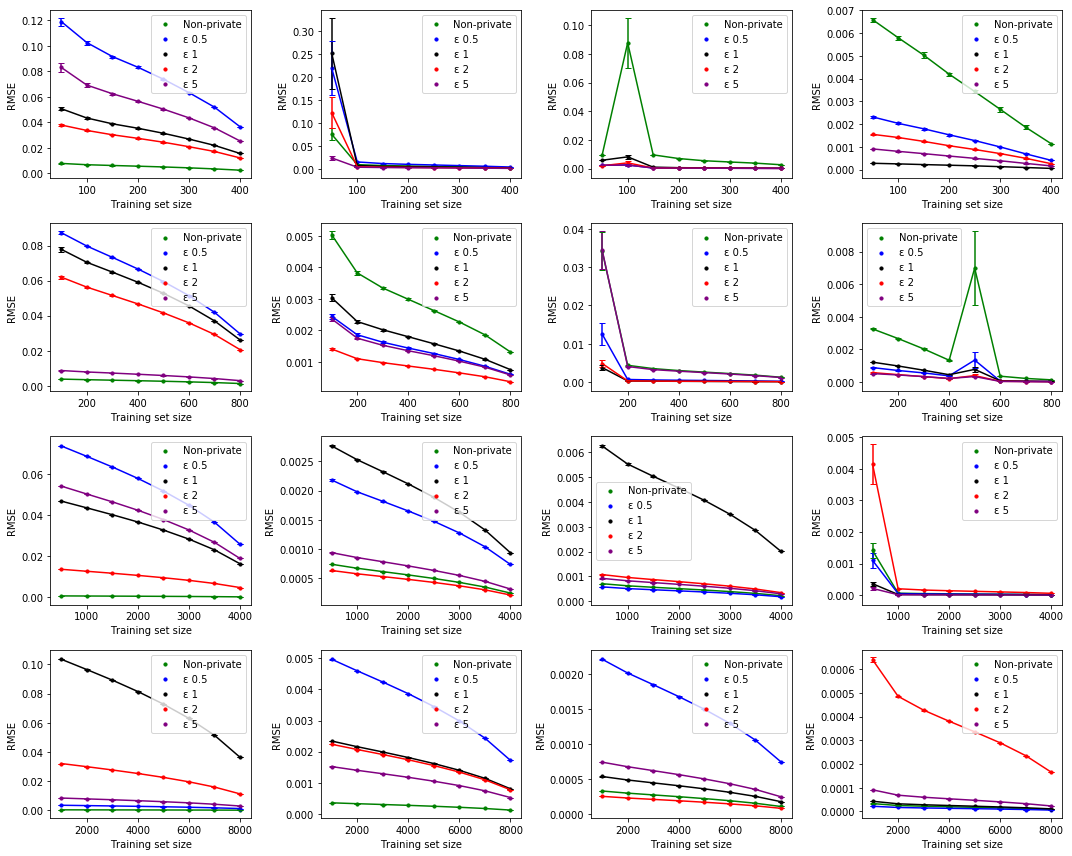

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math
from sklearn.preprocessing import normalize
import pylab

entries = [500, 1000, 5000, 10000]                     
features = [10, 50, 100, 500]
epsilon = [0.5, 1, 2, 5] 
k = 5
colors = ["blue", "black", "red", "purple", "green"]

multiple_epsilon_plotter(entries, features, epsilon, k, colors)